# Training NeuroUNET
Testing training UNET model on a small subset of the data

In [27]:
from torch.utils.data import DataLoader
from pathlib import Path
import matplotlib.pyplot as plt

# custom
from dataset import EMDataset
from image_preprocessing import PreprocessImage
from model import train_model, NeuroUNET

In [28]:
image_dir = Path("./images/processed_zstack")
img_list = list(image_dir.glob("*.tif"))

# select only 10 for test
img_list = img_list[:10]

# Split into train/val sets
train_split = int(0.8 * len(img_list))
train_idx = img_list[:train_split]
val_idx = img_list[train_split:]

In [29]:
# Create datasets
train_dataset = EMDataset(
    image_paths=train_idx,
    tile_size=256,
    stride=128,  # 50% overlap for training
    preprocess_fn=PreprocessImage,
    augment=True
)

# just to look at how preprocessing affects images
train_dataset_nopre = EMDataset(
    image_paths=train_idx,
    tile_size=256,
    stride=128,
    augment=True)


val_dataset = EMDataset(
    image_paths=val_idx,
    tile_size=256, # stride and tile size
    preprocess_fn=PreprocessImage,
    augment=False
)


In [30]:
# Create dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=16,
    shuffle=False,
    pin_memory=True
)

In [31]:
print(f"Training dataset: {len(train_dataset)} tiles")
print(f"Validation dataset: {len(val_dataset)} tiles")

Training dataset: 2312 tiles
Validation dataset: 162 tiles


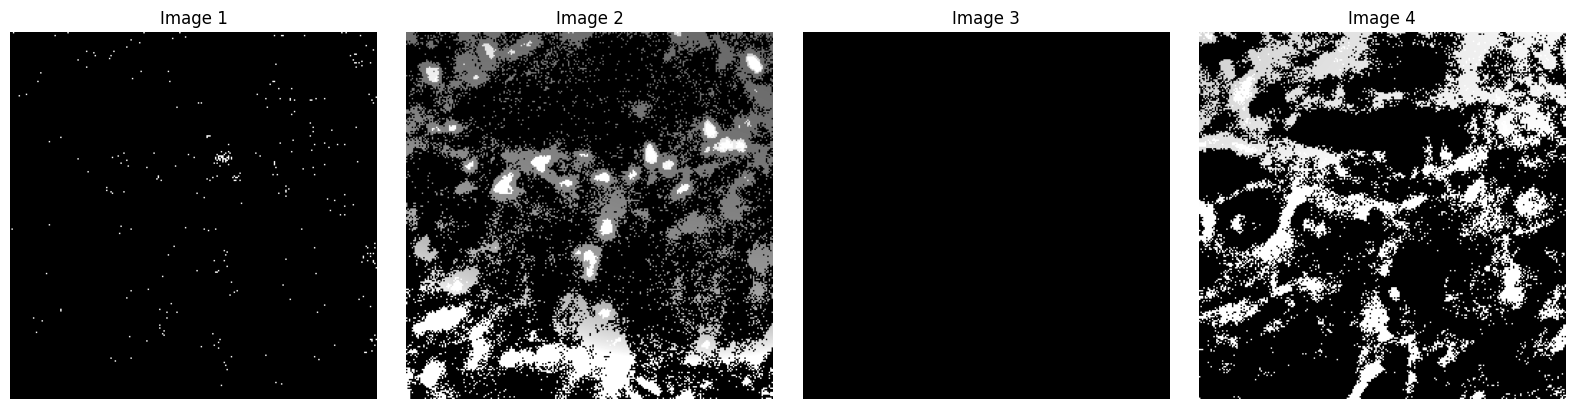

In [32]:
# look at a tile in the training data
example_tile = train_dataset.__getitem__(50)
example_tile.shape

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    image_to_plot = example_tile[i].numpy()

    axes[i].imshow(image_to_plot, cmap='gray')
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

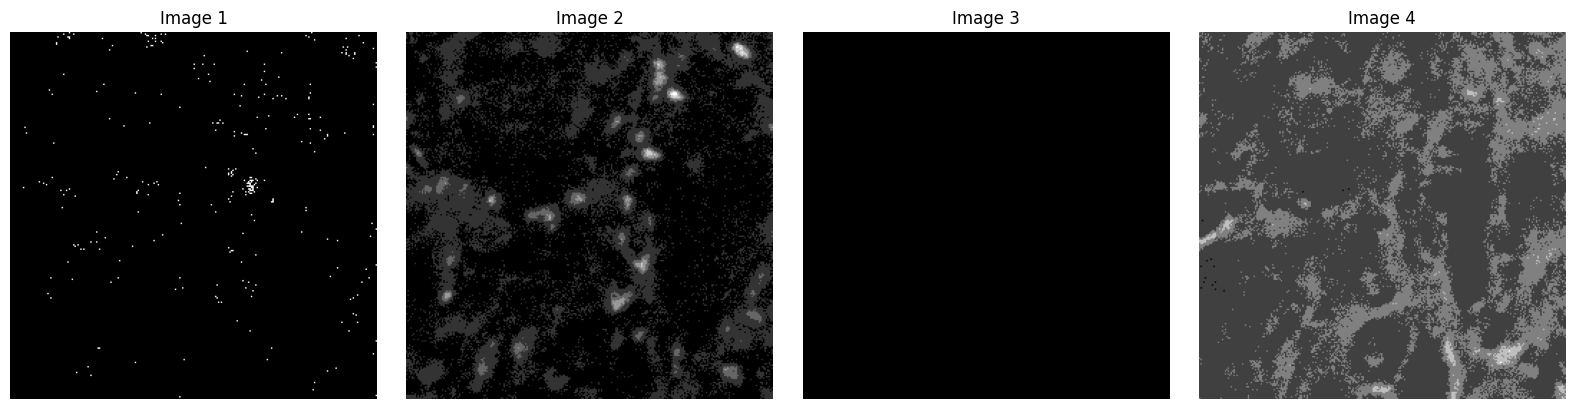

In [33]:
# look at a tile in the training data
example_tile = train_dataset_nopre.__getitem__(50)
example_tile.shape

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    image_to_plot = example_tile[i].numpy()

    axes[i].imshow(image_to_plot, cmap='gray')
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [34]:
model = NeuroUNET(in_channels=2, out_channels=2)
print(f'Total parameters: {sum(p.numel() for p in model.parameters())}')

Total parameters: 7702466


In [ ]:
for batch_idx, batch in enumerate(train_loader):
    print(f"Batch {batch_idx}: shape {batch.shape}")
    
    model = train_model(model, train_loader, val_loader, device='cpu')
    
    if batch_idx == 0:
        break

Batch 0: shape torch.Size([16, 4, 256, 256])


/Users/peneeta/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 